<a href="https://colab.research.google.com/github/jaquelinecella/Analise_Exploratoria_Pandas/blob/main/Projeto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJETO DE ANÁLISE EXPLORATÓRIA** 

Análise Exploratória realizada com dados das bolsas de estudo PROUNI concedidas no ano de 2020. Os dados foram extraídos do site oficial do Governo Federal https://dadosabertos.mec.gov.br/prouni/item/124-bolsas-e-perfil-2020. Projeto em construção 04/04/2022.

#1) Importação das bibliotecas que serão utilizadas

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap


#2)Leitura do arquivo original extraído do site oficial

In [3]:
original = pd.read_csv('ProuniRelatorioDadosAbertos2020.csv', encoding="ISO-8859-1", sep = ';')
                       

##3)Limpeza, organização e transformação dos dados

In [4]:
original

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,11/08/1973,N,SUDESTE,MG,GOVERNADOR VALADARES
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,13/05/1987,N,NORDESTE,CE,FORTALEZA
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,23/07/2001,N,NORDESTE,CE,MOMBACA
3,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,04/04/2003,N,NORDESTE,BA,IBITITA
4,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,07/12/1977,N,SUDESTE,SP,SAO PAULO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166825,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CABO FRIO,PAP CABO FRIO,PARCIAL,EAD,ADMINISTRAÇO,CURSO A DIST¶NCIA,062.XXX.XXX-70,F,Parda,30/11/1996,N,SUDESTE,RJ,SAO PEDRO DA ALDEIA
166826,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CABO FRIO,PAP CABO FRIO,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,177.XXX.XXX-80,F,Parda,25/03/2002,N,SUDESTE,RJ,ARARUAMA
166827,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CANOAS,PAP CANOAS,PARCIAL,EAD,ADMINISTRAÇO,CURSO A DIST¶NCIA,042.XXX.XXX-54,M,Branca,19/04/1997,N,SUL,RS,CANOAS
166828,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,ANANINDEUA,PAP ANANINDEUA,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,601.XXX.XXX-53,F,Parda,17/09/1975,N,NORTE,PA,ANANINDEUA


##Gerando cópia do arquivo original para realizar manipulação com segurança

In [5]:
original_copia = original.copy()

In [6]:
original_copia.head(10)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,11/08/1973,N,SUDESTE,MG,GOVERNADOR VALADARES
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,13/05/1987,N,NORDESTE,CE,FORTALEZA
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,23/07/2001,N,NORDESTE,CE,MOMBACA
3,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,04/04/2003,N,NORDESTE,BA,IBITITA
4,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,07/12/1977,N,SUDESTE,SP,SAO PAULO
5,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,UNIDADE JABAQUARA,INTEGRAL,PRESENCIAL,MEDICINA VETERINµRIA,NOTURNO,508.XXX.XXX-99,F,Parda,17/12/2001,N,SUDESTE,SP,SAO PAULO
6,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,UNIDADE JABAQUARA,PARCIAL,PRESENCIAL,MEDICINA VETERINµRIA,NOTURNO,450.XXX.XXX-80,F,Branca,20/07/1999,N,SUDESTE,SP,SAO BERNARDO DO CAMPO
7,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,UNIDADE SEDE,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,364.XXX.XXX-69,F,Branca,13/02/2002,N,SUDESTE,SP,SAO PAULO
8,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,UNIDADE SEDE,PARCIAL,PRESENCIAL,DIREITO,NOTURNO,451.XXX.XXX-70,F,Branca,08/06/2001,N,SUDESTE,SP,SAO PAULO
9,2020,3741,FACULDADE PITµGORAS BACABAL MEARIM,BACABAL,UNIDADE SEDE,INTEGRAL,PRESENCIAL,FARMµCIA,MATUTINO,006.XXX.XXX-62,F,Parda,24/07/1984,N,NORDESTE,MA,SANTA INES


##Verificando a quantidade de linhas e colunas do DataFrame


In [7]:
original_copia.shape

(166830, 17)

In [8]:
original_copia.head(5)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,11/08/1973,N,SUDESTE,MG,GOVERNADOR VALADARES
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,13/05/1987,N,NORDESTE,CE,FORTALEZA
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,23/07/2001,N,NORDESTE,CE,MOMBACA
3,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,04/04/2003,N,NORDESTE,BA,IBITITA
4,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,07/12/1977,N,SUDESTE,SP,SAO PAULO


##Verificando o tipo dos dados presentes no DataFrame para identificar se é necessário realizar conversão

In [9]:
original_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64 
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64 
 2   NOME_IES_BOLSA                  166830 non-null  object
 3   MUNICIPIO                       166830 non-null  object
 4   CAMPUS                          166830 non-null  object
 5   TIPO_BOLSA                      166830 non-null  object
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  object
 7   NOME_CURSO_BOLSA                166792 non-null  object
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  object
 9   CPF_BENEFICIARIO                166830 non-null  object
 10  SEXO_BENEFICIARIO               166830 non-null  object
 11  RACA_BENEFICIARIO               166830 non-null  object
 12  DATA_NASCIMENTO               

##Convertendo o formato do campo 'DATA_NASCIMENTO' para datetime.

In [10]:
pd.to_datetime(original_copia['DATA_NASCIMENTO'])

0        1973-11-08
1        1987-05-13
2        2001-07-23
3        2003-04-04
4        1977-07-12
            ...    
166825   1996-11-30
166826   2002-03-25
166827   1997-04-19
166828   1975-09-17
166829   1996-06-25
Name: DATA_NASCIMENTO, Length: 166830, dtype: datetime64[ns]

In [11]:
original_copia['DATA_NASCIMENTO'] = pd.to_datetime(original_copia['DATA_NASCIMENTO'])

In [12]:
original_copia.info() #conversão ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  object        
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  object        
 7   NOME_CURSO_BOLSA                166792 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  object        
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  object 

In [13]:
original_copia.head(5)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,1973-11-08,N,SUDESTE,MG,GOVERNADOR VALADARES
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,1987-05-13,N,NORDESTE,CE,FORTALEZA
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,2001-07-23,N,NORDESTE,CE,MOMBACA
3,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,2003-04-04,N,NORDESTE,BA,IBITITA
4,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,1977-07-12,N,SUDESTE,SP,SAO PAULO


In [14]:
original_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  object        
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  object        
 7   NOME_CURSO_BOLSA                166792 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  object        
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  object 

##Verificando quantos dados há por coluna para avaliar a transformação para category.

In [15]:
original_copia.nunique()

ANO_CONCESSAO_BOLSA                   1
CODIGO_EMEC_IES_BOLSA              1333
NOME_IES_BOLSA                     1375
MUNICIPIO                          1434
CAMPUS                             6463
TIPO_BOLSA                            2
MODALIDADE_ENSINO_BOLSA               2
NOME_CURSO_BOLSA                    317
NOME_TURNO_CURSO_BOLSA                5
CPF_BENEFICIARIO                  41390
SEXO_BENEFICIARIO                     2
RACA_BENEFICIARIO                     6
DATA_NASCIMENTO                   11793
BENEFICIARIO_DEFICIENTE_FISICO        2
REGIAO_BENEFICIARIO                   5
UF_BENEFICIARIO                      27
MUNICIPIO_BENEFICIARIO             4885
dtype: int64

##Ordenando os dados para facilitar a identificação

In [16]:
ordenando = pd.DataFrame.from_records([(col, original_copia[col].nunique())
              for col in original_copia.columns],
              columns=['coluna', 'qt_dados']).sort_values(by=['qt_dados'])

In [17]:
ordenando

,coluna,qt_dados
0,ANO_CONCESSAO_BOLSA,1
13,BENEFICIARIO_DEFICIENTE_FISICO,2
10,SEXO_BENEFICIARIO,2
6,MODALIDADE_ENSINO_BOLSA,2
5,TIPO_BOLSA,2
14,REGIAO_BENEFICIARIO,5
8,NOME_TURNO_CURSO_BOLSA,5
11,RACA_BENEFICIARIO,6
15,UF_BENEFICIARIO,27
7,NOME_CURSO_BOLSA,317


##Organizando colunas para transformação para category

In [18]:
cat = ['ANO_CONCESSAO_BOLSA', 'BENEFICIARIO_DEFICIENTE_FISICO', 'SEXO_BENEFICIARIO', 'MODALIDADE_ENSINO_BOLSA', 'TIPO_BOLSA', 'REGIAO_BENEFICIARIO',
 'NOME_TURNO_CURSO_BOLSA', 'RACA_BENEFICIARIO']

In [19]:
print(cat)

['ANO_CONCESSAO_BOLSA', 'BENEFICIARIO_DEFICIENTE_FISICO', 'SEXO_BENEFICIARIO', 'MODALIDADE_ENSINO_BOLSA', 'TIPO_BOLSA', 'REGIAO_BENEFICIARIO', 'NOME_TURNO_CURSO_BOLSA', 'RACA_BENEFICIARIO']


##Convertendo os atributos para category

In [20]:
for a in cat:
  original_copia[a]= pd.Categorical(original_copia[a])

In [21]:
original_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  category      
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  category      
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  category      
 7   NOME_CURSO_BOLSA                166792 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  category      
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  categor

##Ano da concessão da bolsa deveria ter ficado 'int' para fazer a subtração com o "ANO_NASCIMENTO"

In [23]:
original_copia['ANO_CONCESSAO_BOLSA'] = original_copia['ANO_CONCESSAO_BOLSA'].astype(int)

In [24]:
original_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  category      
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  category      
 7   NOME_CURSO_BOLSA                166792 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  category      
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  categor

In [25]:
original_copia.isnull()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166825,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166826,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166827,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166828,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
original_copia['NOME_CURSO_BOLSA'].nunique()

317

##Verificando se há um 'TRUE'que indique valores nulos

In [27]:
original_copia.isnull().nunique()


ANO_CONCESSAO_BOLSA               1
CODIGO_EMEC_IES_BOLSA             1
NOME_IES_BOLSA                    1
MUNICIPIO                         1
CAMPUS                            1
TIPO_BOLSA                        1
MODALIDADE_ENSINO_BOLSA           1
NOME_CURSO_BOLSA                  2
NOME_TURNO_CURSO_BOLSA            1
CPF_BENEFICIARIO                  1
SEXO_BENEFICIARIO                 1
RACA_BENEFICIARIO                 1
DATA_NASCIMENTO                   1
BENEFICIARIO_DEFICIENTE_FISICO    1
REGIAO_BENEFICIARIO               1
UF_BENEFICIARIO                   1
MUNICIPIO_BENEFICIARIO            1
dtype: int64

##Conforme também verificado com o 'nunique', há algo a ser observado no campo "NOME_CURSO_BOLSA". Problema desde a origem, pois coluna não foi manipulada.

In [29]:
nome_curso_bolsa_ordem = original_copia['NOME_CURSO_BOLSA'].value_counts()

In [30]:
nome_curso_bolsa_ordem

DIREITO                                               15083
ADMINISTRAÇO                                         14888
PEDAGOGIA                                             13660
ENFERMAGEM                                             9234
CIÒNCIAS CONTµBEIS                                     8570
                                                      ...  
SOLDAGEM                                                  1
TRADUÇO E INTERPRETAÇO                                  1
SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÒS/INGLÒS        1
PROCESSOS METALéRGICOS                                    1
COMPUTAÇO GRµFICA                                        1
Name: NOME_CURSO_BOLSA, Length: 317, dtype: int64

In [31]:
nome_curso_bolsa_ordem.sort_values()

COMPUTAÇO GRµFICA                   1
NEGàCIOS DIGITAIS                    1
GESTÇO EM LOGÖSTICA                  1
ACUPUNTURA                           1
GESTÇO EM VIGIL¶NCIA EM SAéDE        1
                                 ...  
CIÒNCIAS CONTµBEIS                8570
ENFERMAGEM                        9234
PEDAGOGIA                        13660
ADMINISTRAÇO                    14888
DIREITO                          15083
Name: NOME_CURSO_BOLSA, Length: 317, dtype: int64

In [32]:
original_copia.isna().nunique()

ANO_CONCESSAO_BOLSA               1
CODIGO_EMEC_IES_BOLSA             1
NOME_IES_BOLSA                    1
MUNICIPIO                         1
CAMPUS                            1
TIPO_BOLSA                        1
MODALIDADE_ENSINO_BOLSA           1
NOME_CURSO_BOLSA                  2
NOME_TURNO_CURSO_BOLSA            1
CPF_BENEFICIARIO                  1
SEXO_BENEFICIARIO                 1
RACA_BENEFICIARIO                 1
DATA_NASCIMENTO                   1
BENEFICIARIO_DEFICIENTE_FISICO    1
REGIAO_BENEFICIARIO               1
UF_BENEFICIARIO                   1
MUNICIPIO_BENEFICIARIO            1
dtype: int64

##Verificando quais as linhas que estão com valores nulos no DataFrame

In [34]:
faltantes = original_copia[original_copia['NOME_CURSO_BOLSA'].isna()]


In [35]:
faltantes

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
166273,2020,1270,CENTRO UNIVERSITµRIO ESTµCIO DE RIBEIRÇO PRETO,ITAJAI,EAD ITAJAÖ - SC,INTEGRAL,EAD,NaN,CURSO A DIST¶NCIA,106.XXX.XXX-77,F,Branca,1998-01-06,N,SUL,SC,ITAJAI
166274,2020,14,UNIVERSIDADE DO VALE DO RIO DOS SINOS,CAXIAS DO SUL,POLO UNISINOS CAXIAS DO SUL,INTEGRAL,EAD,NaN,CURSO A DIST¶NCIA,868.XXX.XXX-53,M,Parda,1983-07-07,N,SUL,RS,CAXIAS DO SUL
166353,2020,519,UNIVERSIDADE CATàLICA DO SALVADOR,SALVADOR,CAMPUS - FEDERAÇO,INTEGRAL,PRESENCIAL,NaN,MATUTINO,075.XXX.XXX-12,F,NÆo Informada,1999-12-06,N,NORDESTE,BA,SIMOES FILHO
166405,2020,137,CENTRO UNIVERSITµRIO SAGRADO CORAÇO,BAURU,CAMPUS - BAURU - JARDIM BRASIL,INTEGRAL,PRESENCIAL,NaN,NOTURNO,465.XXX.XXX-85,M,Branca,2000-11-17,N,SUDESTE,SP,IACANGA
166406,2020,4915,FACULDADE ESTµCIO DE CASTANHAL,CASTANHAL,CASTANHAL,INTEGRAL,PRESENCIAL,NaN,NOTURNO,053.XXX.XXX-46,M,NÆo Informada,2001-09-13,N,NORTE,PA,ABAETETUBA
166407,2020,457,UNIVERSIDADE ANHANGUERA DE SÇO PAULO,SAO PAULO,SAO PAULO (CL),INTEGRAL,PRESENCIAL,NaN,MATUTINO,424.XXX.XXX-35,F,Branca,1996-12-28,N,SUDESTE,SP,TABOAO DA SERRA
166420,2020,434,FACULDADE SANTA MARCELINA,SAO PAULO,UNIDADE ITAQUERA,INTEGRAL,PRESENCIAL,NaN,INTEGRAL,122.XXX.XXX-06,M,Branca,2000-01-27,N,SUDESTE,MG,PARA DE MINAS
166421,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,RIO DE JANEIRO,EAD BONSUCESSO - RJ,INTEGRAL,EAD,NaN,CURSO A DIST¶NCIA,118.XXX.XXX-33,M,Preta,1996-02-10,N,SUDESTE,RJ,RIO DE JANEIRO
166472,2020,1414,CENTRO UNIVERSITµRIO SÇO LUCAS,PORTO VELHO,CAMPUS 1,PARCIAL,PRESENCIAL,NaN,INTEGRAL,147.XXX.XXX-90,F,Parda,1995-01-18,N,NORTE,PA,MARABA
166491,2020,2835,CENTRO UNIVERSITµRIO MAURÖCIO DE NASSAU,RECIFE,UNINASSAU - SEDE,INTEGRAL,PRESENCIAL,NaN,MATUTINO,131.XXX.XXX-59,M,Parda,2000-09-11,N,NORDESTE,PE,JABOATAO DOS GUARARAPES


##Verificando a quantidade de linhas que estão com NaN

In [36]:
faltantes.shape

(38, 17)

##Fazendo uma cópia do DataFrame para testar o 'fillna'

In [37]:
copia_2 = original_copia.copy()

##Substituindo os valores NaN para "NAO INFORMADO".

In [39]:
copia_2['NOME_CURSO_BOLSA'] = copia_2['NOME_CURSO_BOLSA'] .fillna(value='NAO INFORMADO')

In [40]:
copia_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  category      
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  category      
 7   NOME_CURSO_BOLSA                166830 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  category      
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  categor

##O 'fillna' parece ter funcionado

In [42]:
copia_2.isnull().nunique()

ANO_CONCESSAO_BOLSA               1
CODIGO_EMEC_IES_BOLSA             1
NOME_IES_BOLSA                    1
MUNICIPIO                         1
CAMPUS                            1
TIPO_BOLSA                        1
MODALIDADE_ENSINO_BOLSA           1
NOME_CURSO_BOLSA                  1
NOME_TURNO_CURSO_BOLSA            1
CPF_BENEFICIARIO                  1
SEXO_BENEFICIARIO                 1
RACA_BENEFICIARIO                 1
DATA_NASCIMENTO                   1
BENEFICIARIO_DEFICIENTE_FISICO    1
REGIAO_BENEFICIARIO               1
UF_BENEFICIARIO                   1
MUNICIPIO_BENEFICIARIO            1
dtype: int64

In [43]:
copia_2.isnull()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166825,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166826,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166827,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166828,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
copia_2['NOME_CURSO_BOLSA'].isnull().nunique()

1

##Aplicando o 'fillna' para a primeira cópia 'original_copia'

In [46]:
original_copia['NOME_CURSO_BOLSA'] = original_copia['NOME_CURSO_BOLSA'] .fillna(value='NAO INFORMADO')

In [47]:
original_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  category      
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  category      
 7   NOME_CURSO_BOLSA                166830 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  category      
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  categor

In [48]:
original_copia.isnull()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166825,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166826,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166827,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
166828,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
original_copia.isnull().nunique()

ANO_CONCESSAO_BOLSA               1
CODIGO_EMEC_IES_BOLSA             1
NOME_IES_BOLSA                    1
MUNICIPIO                         1
CAMPUS                            1
TIPO_BOLSA                        1
MODALIDADE_ENSINO_BOLSA           1
NOME_CURSO_BOLSA                  1
NOME_TURNO_CURSO_BOLSA            1
CPF_BENEFICIARIO                  1
SEXO_BENEFICIARIO                 1
RACA_BENEFICIARIO                 1
DATA_NASCIMENTO                   1
BENEFICIARIO_DEFICIENTE_FISICO    1
REGIAO_BENEFICIARIO               1
UF_BENEFICIARIO                   1
MUNICIPIO_BENEFICIARIO            1
dtype: int64

In [50]:
original_copia['NOME_CURSO_BOLSA'].isnull().nunique()

1

##Adicionando uma coluna para cálculo da idade dos bolsistas

In [51]:
original_copia.tail(2)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
166828,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,ANANINDEUA,PAP ANANINDEUA,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,601.XXX.XXX-53,F,Parda,1975-09-17,N,NORTE,PA,ANANINDEUA
166829,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,LAJEADO,PAP LAJEADO,PARCIAL,EAD,MéSICA,CURSO A DIST¶NCIA,032.XXX.XXX-63,M,Branca,1996-06-25,N,SUL,RS,ESTRELA


In [52]:
original_copia['ANO_CONCESSAO_BOLSA'].dtype


dtype('int64')

##Fazendo mais uma cópia para manipular o DataFrame e adicionando mais um coluna chamada 'ANO_NASCIMENTO'.

In [53]:
copia_3 = original_copia.copy()

In [54]:
copia_3.head(3)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,1973-11-08,N,SUDESTE,MG,GOVERNADOR VALADARES
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,1987-05-13,N,NORDESTE,CE,FORTALEZA
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,2001-07-23,N,NORDESTE,CE,MOMBACA


In [55]:
copia_3['ANO_NASCIMENTO']=copia_3['DATA_NASCIMENTO'].dt.year

In [56]:
copia_3.head(5)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,ANO_NASCIMENTO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,1973-11-08,N,SUDESTE,MG,GOVERNADOR VALADARES,1973
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,1987-05-13,N,NORDESTE,CE,FORTALEZA,1987
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,2001-07-23,N,NORDESTE,CE,MOMBACA,2001
3,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,2003-04-04,N,NORDESTE,BA,IBITITA,2003
4,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,1977-07-12,N,SUDESTE,SP,SAO PAULO,1977


##Verificando se campos estão no mesmo formato

In [57]:
copia_3['ANO_NASCIMENTO'].dtype

dtype('int64')

In [58]:
copia_3['ANO_CONCESSAO_BOLSA'].dtype

dtype('int64')

In [59]:
copia_3['IDADE']= copia_3['ANO_CONCESSAO_BOLSA'] - copia_3['ANO_NASCIMENTO']

In [60]:
copia_3.tail(4)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,ANO_NASCIMENTO,IDADE
166826,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CABO FRIO,PAP CABO FRIO,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,177.XXX.XXX-80,F,Parda,2002-03-25,N,SUDESTE,RJ,ARARUAMA,2002,18
166827,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CANOAS,PAP CANOAS,PARCIAL,EAD,ADMINISTRAÇO,CURSO A DIST¶NCIA,042.XXX.XXX-54,M,Branca,1997-04-19,N,SUL,RS,CANOAS,1997,23
166828,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,ANANINDEUA,PAP ANANINDEUA,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,601.XXX.XXX-53,F,Parda,1975-09-17,N,NORTE,PA,ANANINDEUA,1975,45
166829,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,LAJEADO,PAP LAJEADO,PARCIAL,EAD,MéSICA,CURSO A DIST¶NCIA,032.XXX.XXX-63,M,Branca,1996-06-25,N,SUL,RS,ESTRELA,1996,24


##Adicionando colunas 'ANO_NASCIMENTO' e 'IDADE' para o DataFrame 'original_copia'.

In [61]:
original_copia['ANO_NASCIMENTO']=original_copia['DATA_NASCIMENTO'].dt.year

In [62]:
original_copia['IDADE']= original_copia['ANO_CONCESSAO_BOLSA'] - original_copia['ANO_NASCIMENTO']

In [63]:
original_copia.tail(3)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,ANO_NASCIMENTO,IDADE
166827,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CANOAS,PAP CANOAS,PARCIAL,EAD,ADMINISTRAÇO,CURSO A DIST¶NCIA,042.XXX.XXX-54,M,Branca,1997-04-19,N,SUL,RS,CANOAS,1997,23
166828,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,ANANINDEUA,PAP ANANINDEUA,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,601.XXX.XXX-53,F,Parda,1975-09-17,N,NORTE,PA,ANANINDEUA,1975,45
166829,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,LAJEADO,PAP LAJEADO,PARCIAL,EAD,MéSICA,CURSO A DIST¶NCIA,032.XXX.XXX-63,M,Branca,1996-06-25,N,SUL,RS,ESTRELA,1996,24


In [64]:
original_copia.describe().round(2)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,ANO_NASCIMENTO,IDADE
count,166830.0,166830.00,166830.00,166830.00
mean,2020.0,2270.75,1996.95,23.05
std,0.0,4063.33,6.60,6.60
min,2020.0,10.00,1929.00,0.00
25%,2020.0,322.00,1995.00,19.00
50%,2020.0,1196.00,2000.00,20.00
75%,2020.0,1952.00,2001.00,25.00
max,2020.0,24488.00,2020.00,91.00


In [65]:
original_copia['IDADE'].mean()

23.049607384762933

In [66]:
original_copia['IDADE'].max()

91

In [67]:
original_copia['IDADE'].isna().unique()

array([False])

##Identificado erro em algum campo da 'IDADE'

In [68]:
original_copia['IDADE'].min()

0

In [69]:
original_copia['IDADE']

0         47
1         33
2         19
3         17
4         43
          ..
166825    24
166826    18
166827    23
166828    45
166829    24
Name: IDADE, Length: 166830, dtype: int64

In [70]:
original_copia.head(5)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,ANO_NASCIMENTO,IDADE
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,1973-11-08,N,SUDESTE,MG,GOVERNADOR VALADARES,1973,47
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,1987-05-13,N,NORDESTE,CE,FORTALEZA,1987,33
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,2001-07-23,N,NORDESTE,CE,MOMBACA,2001,19
3,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,PARCIAL,PRESENCIAL,DIREITO,MATUTINO,089.XXX.XXX-40,F,Branca,2003-04-04,N,NORDESTE,BA,IBITITA,2003,17
4,2020,203,UNIVERSIDADE SÇO JUDAS TADEU,SAO PAULO,PAULISTA,INTEGRAL,PRESENCIAL,DIREITO,MATUTINO,173.XXX.XXX-09,F,Branca,1977-07-12,N,SUDESTE,SP,SAO PAULO,1977,43


In [71]:
original_copia.loc[:, 'IDADE']


0         47
1         33
2         19
3         17
4         43
          ..
166825    24
166826    18
166827    23
166828    45
166829    24
Name: IDADE, Length: 166830, dtype: int64

In [72]:
original_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  category      
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  category      
 7   NOME_CURSO_BOLSA                166830 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  category      
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  categor

##Verificando campos preenchidos com idade menor de 16 anos

In [73]:
menor_16 = original_copia[original_copia['IDADE']<16]

In [74]:
menor_16

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,ANO_NASCIMENTO,IDADE
422,2020,322,UNIVERSIDADE PAULISTA,FORTALEZA,FORTALEZA III,INTEGRAL,EAD,ADMINISTRAÇO,CURSO A DIST¶NCIA,039.XXX.XXX-33,F,Parda,2020-05-03,N,NORDESTE,CE,FORTALEZA,2020,0
671,2020,2870,FACULDADE SERRA DO CARMO,PALMAS,UNIDADE SEDE,INTEGRAL,PRESENCIAL,ADMINISTRAÇO,MATUTINO,073.XXX.XXX-09,F,Parda,2020-12-19,N,NORTE,TO,PALMAS,2020,0
3774,2020,3854,FACULDADE IDEAL DE BRASÖLIA,BRASILIA,CAMPUS II,INTEGRAL,PRESENCIAL,MATEMµTICA,NOTURNO,391.XXX.XXX-04,M,Branca,2009-03-27,N,CENTRO-OESTE,DF,BRASILIA,2009,11
28926,2020,1598,CENTRO UNIVERSITµRIO UNA DE UBERL¶NDIA,UBERLANDIA,UNIDADE SEDE,INTEGRAL,PRESENCIAL,ODONTOLOGIA,NOTURNO,143.XXX.XXX-54,F,Branca,2020-10-15,N,SUDESTE,MG,UBERLANDIA,2020,0
125867,2020,1967,FACULDADE DO VALE DO ITAPECURé,CAXIAS,SEDE,INTEGRAL,PRESENCIAL,ENFERMAGEM,NOTURNO,616.XXX.XXX-00,M,Parda,2020-08-20,N,NORDESTE,MA,CAXIAS,2020,0
132417,2020,383,UNIVERSIDADE DA AMAZâNIA,ANANINDEUA,CAMPUS ANANINDEUA,INTEGRAL,PRESENCIAL,ENFERMAGEM,MATUTINO,044.XXX.XXX-94,M,Parda,2020-01-07,N,NORTE,PA,BELEM,2020,0
135200,2020,207,CENTRO UNIVERSITµRIO MOURA LACERDA,RIBEIRAO PRETO,UNIDADE II - CAMPUS RIBEIRÇO PRETO,PARCIAL,PRESENCIAL,EDUCAÇO FÖSICA,MATUTINO,467.XXX.XXX-00,F,NÆo Informada,2017-03-07,N,SUDESTE,SP,SERTAOZINHO,2017,3
158926,2020,374,CENTRO UNIVERSITµRIO DAS FACULDADES METROPOLIT...,SAO PAULO,FMU - LIBERDADE,INTEGRAL,PRESENCIAL,FISIOTERAPIA,NOTURNO,421.XXX.XXX-09,M,Branca,2012-11-26,N,SUDESTE,SP,SAO PAULO,2012,8
161676,2020,1775,CENTRO UNIVERSITµRIO FAVIP WYDEN,CARUARU,CARUARU - INDIANàPOLIS,PARCIAL,PRESENCIAL,ENGENHARIA CIVIL,NOTURNO,708.XXX.XXX-00,M,Branca,2020-06-08,N,NORDESTE,PE,JUPI,2020,0
166717,2020,298,UNIVERSIDADE PITµGORAS UNOPAR,GUARAPARI,GUARAPARI/ES - I(1059479)U,INTEGRAL,EAD,NAO INFORMADO,CURSO A DIST¶NCIA,151.XXX.XXX-99,F,Parda,2019-10-23,N,SUDESTE,ES,GUARAPARI,2019,1


In [75]:
menor_16.shape

(10, 19)

Ao manipular o DataFrame percebi que a idade mínima era 16 anos e o restante das idades eram 0, 1, 3, 8 e 11 configurando assim, possível erro de digitação na data de nascimento. Para tentar corrigir o problema irei modificar para que estas 10 linhas sejam corrigidas para a média das idades. 

##Fazendo uma cópia do DataFrame por segurança

In [76]:
copia_4=original_copia.copy()

In [77]:
copia_4.describe()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,ANO_NASCIMENTO,IDADE
count,166830.0,166830.000000,166830.000000,166830.000000
mean,2020.0,2270.745022,1996.950393,23.049607
std,0.0,4063.329275,6.601837,6.601837
min,2020.0,10.000000,1929.000000,0.000000
25%,2020.0,322.000000,1995.000000,19.000000
50%,2020.0,1196.000000,2000.000000,20.000000
75%,2020.0,1952.000000,2001.000000,25.000000
max,2020.0,24488.000000,2020.000000,91.000000


In [78]:
menor_16_2 = copia_4[copia_4['IDADE']<16]

In [79]:
menor_16_2

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,ANO_NASCIMENTO,IDADE
422,2020,322,UNIVERSIDADE PAULISTA,FORTALEZA,FORTALEZA III,INTEGRAL,EAD,ADMINISTRAÇO,CURSO A DIST¶NCIA,039.XXX.XXX-33,F,Parda,2020-05-03,N,NORDESTE,CE,FORTALEZA,2020,0
671,2020,2870,FACULDADE SERRA DO CARMO,PALMAS,UNIDADE SEDE,INTEGRAL,PRESENCIAL,ADMINISTRAÇO,MATUTINO,073.XXX.XXX-09,F,Parda,2020-12-19,N,NORTE,TO,PALMAS,2020,0
3774,2020,3854,FACULDADE IDEAL DE BRASÖLIA,BRASILIA,CAMPUS II,INTEGRAL,PRESENCIAL,MATEMµTICA,NOTURNO,391.XXX.XXX-04,M,Branca,2009-03-27,N,CENTRO-OESTE,DF,BRASILIA,2009,11
28926,2020,1598,CENTRO UNIVERSITµRIO UNA DE UBERL¶NDIA,UBERLANDIA,UNIDADE SEDE,INTEGRAL,PRESENCIAL,ODONTOLOGIA,NOTURNO,143.XXX.XXX-54,F,Branca,2020-10-15,N,SUDESTE,MG,UBERLANDIA,2020,0
125867,2020,1967,FACULDADE DO VALE DO ITAPECURé,CAXIAS,SEDE,INTEGRAL,PRESENCIAL,ENFERMAGEM,NOTURNO,616.XXX.XXX-00,M,Parda,2020-08-20,N,NORDESTE,MA,CAXIAS,2020,0
132417,2020,383,UNIVERSIDADE DA AMAZâNIA,ANANINDEUA,CAMPUS ANANINDEUA,INTEGRAL,PRESENCIAL,ENFERMAGEM,MATUTINO,044.XXX.XXX-94,M,Parda,2020-01-07,N,NORTE,PA,BELEM,2020,0
135200,2020,207,CENTRO UNIVERSITµRIO MOURA LACERDA,RIBEIRAO PRETO,UNIDADE II - CAMPUS RIBEIRÇO PRETO,PARCIAL,PRESENCIAL,EDUCAÇO FÖSICA,MATUTINO,467.XXX.XXX-00,F,NÆo Informada,2017-03-07,N,SUDESTE,SP,SERTAOZINHO,2017,3
158926,2020,374,CENTRO UNIVERSITµRIO DAS FACULDADES METROPOLIT...,SAO PAULO,FMU - LIBERDADE,INTEGRAL,PRESENCIAL,FISIOTERAPIA,NOTURNO,421.XXX.XXX-09,M,Branca,2012-11-26,N,SUDESTE,SP,SAO PAULO,2012,8
161676,2020,1775,CENTRO UNIVERSITµRIO FAVIP WYDEN,CARUARU,CARUARU - INDIANàPOLIS,PARCIAL,PRESENCIAL,ENGENHARIA CIVIL,NOTURNO,708.XXX.XXX-00,M,Branca,2020-06-08,N,NORDESTE,PE,JUPI,2020,0
166717,2020,298,UNIVERSIDADE PITµGORAS UNOPAR,GUARAPARI,GUARAPARI/ES - I(1059479)U,INTEGRAL,EAD,NAO INFORMADO,CURSO A DIST¶NCIA,151.XXX.XXX-99,F,Parda,2019-10-23,N,SUDESTE,ES,GUARAPARI,2019,1


In [80]:
menor_16_2.shape

(10, 19)

##Solicitando os índices onde as idades estão com erro

In [81]:
menor_16_2.index 

Int64Index([422, 671, 3774, 28926, 125867, 132417, 135200, 158926, 161676,
            166717],
           dtype='int64')

In [153]:
media = copia_4['IDADE'].mean()

##Aplicando a média das idades para os campos com erro

In [83]:
copia_4['IDADE'].mask(copia_4['IDADE'] < 16, media, inplace=True)

In [84]:
copia_4.describe().round(2)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,ANO_NASCIMENTO,IDADE
count,166830.0,166830.00,166830.00,166830.00
mean,2020.0,2270.75,1996.95,23.05
std,0.0,4063.33,6.60,6.60
min,2020.0,10.00,1929.00,16.00
25%,2020.0,322.00,1995.00,19.00
50%,2020.0,1196.00,2000.00,20.00
75%,2020.0,1952.00,2001.00,25.00
max,2020.0,24488.00,2020.00,91.00


##Verificando se a média foi aplicada com o 'mask'

In [85]:
copia_4['IDADE'].min()

16.0

In [86]:
copia_4['IDADE'].max()

91.0

In [87]:
copia_4['IDADE'].mean()

23.050851142323616

#Verificando se todos os índices foram corrigidos com a média

In [88]:
linhas = menor_16_2.index 

In [89]:
linhas

Int64Index([422, 671, 3774, 28926, 125867, 132417, 135200, 158926, 161676,
            166717],
           dtype='int64')

In [90]:
copia_4.loc[linhas, 'IDADE'].round(2)

422       23.05
671       23.05
3774      23.05
28926     23.05
125867    23.05
132417    23.05
135200    23.05
158926    23.05
161676    23.05
166717    23.05
Name: IDADE, dtype: float64

##Aplicando as correções para o DataFrame 'original_copia'.

In [91]:
original_copia['IDADE'].mask(original_copia['IDADE'] < 16, media, inplace=True)

In [92]:
original_copia.describe().round(2)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,ANO_NASCIMENTO,IDADE
count,166830.0,166830.00,166830.00,166830.00
mean,2020.0,2270.75,1996.95,23.05
std,0.0,4063.33,6.60,6.60
min,2020.0,10.00,1929.00,16.00
25%,2020.0,322.00,1995.00,19.00
50%,2020.0,1196.00,2000.00,20.00
75%,2020.0,1952.00,2001.00,25.00
max,2020.0,24488.00,2020.00,91.00


In [93]:
copia_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  category      
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  category      
 7   NOME_CURSO_BOLSA                166830 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  category      
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  categor

In [94]:
copia_4['IDADE']= pd.to_numeric(copia_4['IDADE'])

In [95]:
copia_4['IDADE'].dtypes

dtype('float64')

In [96]:
original_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166830 entries, 0 to 166829
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   ANO_CONCESSAO_BOLSA             166830 non-null  int64         
 1   CODIGO_EMEC_IES_BOLSA           166830 non-null  int64         
 2   NOME_IES_BOLSA                  166830 non-null  object        
 3   MUNICIPIO                       166830 non-null  object        
 4   CAMPUS                          166830 non-null  object        
 5   TIPO_BOLSA                      166830 non-null  category      
 6   MODALIDADE_ENSINO_BOLSA         166830 non-null  category      
 7   NOME_CURSO_BOLSA                166830 non-null  object        
 8   NOME_TURNO_CURSO_BOLSA          166830 non-null  category      
 9   CPF_BENEFICIARIO                166830 non-null  object        
 10  SEXO_BENEFICIARIO               166830 non-null  categor

In [97]:
original_copia['IDADE'].value_counts()

19.000000    32998
18.000000    28107
20.000000    21329
21.000000    15030
22.000000    10545
23.000000     8634
24.000000     6939
25.000000     5885
26.000000     4705
27.000000     3903
28.000000     3226
29.000000     2710
30.000000     2341
31.000000     2111
32.000000     1983
33.000000     1640
34.000000     1519
35.000000     1353
36.000000     1183
37.000000     1154
38.000000     1054
17.000000     1043
39.000000      932
40.000000      812
41.000000      713
42.000000      644
51.000000      549
43.000000      526
44.000000      509
45.000000      431
46.000000      388
47.000000      322
48.000000      275
49.000000      267
50.000000      232
52.000000      176
53.000000      134
54.000000      108
55.000000       81
56.000000       66
57.000000       55
58.000000       43
59.000000       39
61.000000       24
62.000000       24
60.000000       21
63.000000       17
64.000000       10
23.049607       10
16.000000        9
65.000000        5
67.000000        4
66.000000   

In [98]:
original_copia.sort_index(inplace=True)

##Iniciando manipulação com dados geométricos para plotar gráfico HeatMap. Criando um DataFrame específico para esta finalidade.


In [99]:
locator = Nominatim(user_agent = "My_Geocoder")
location = locator.geocode(' Alto da Boa Vista, Rio de Janeiro - RJ')

In [100]:
location

Location(Alto da Boa Vista, Zona Norte do Rio de Janeiro, Região Geográfica Imediata do Rio de Janeiro, Região Metropolitana do Rio de Janeiro, Região Geográfica Intermediária do Rio de Janeiro, Rio de Janeiro, Região Sudeste, 22460-320, Brasil, (-22.9621126, -43.2535816, 0.0))

In [101]:
##tem que adicionar delay de tempo, pois o Nominatim só libera um valor X de requisições free

In [102]:
df = pd.read_csv('ProuniRelatorioDadosAbertos2020.csv', encoding="ISO-8859-1", sep = ';')

In [103]:
df.head(3)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO
0,2020,322,UNIVERSIDADE PAULISTA,IPATINGA,IPATINGA,INTEGRAL,EAD,PEDAGOGIA,CURSO A DIST¶NCIA,991.XXX.XXX-91,F,Parda,11/08/1973,N,SUDESTE,MG,GOVERNADOR VALADARES
1,2020,163,UNIVERSIDADE ESTµCIO DE Sµ,FORTALEZA,EAD VIA CORPVS - CE,INTEGRAL,EAD,MARKETING,CURSO A DIST¶NCIA,067.XXX.XXX-01,M,Parda,13/05/1987,N,NORDESTE,CE,FORTALEZA
2,2020,17670,FACULDADE DE QUIXERAMOBIM,QUIXERAMOBIM,FACULDADE DE QUIXERAMOBIM - UNIQ,INTEGRAL,PRESENCIAL,FARMµCIA,NOTURNO,623.XXX.XXX-27,M,Parda,23/07/2001,N,NORDESTE,CE,MOMBACA


##Adicionando a coluna Pais para obter a localização exata.

In [105]:
df['PAIS']= 'BRASIL'

In [106]:
df.tail(5)

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,MUNICIPIO,CAMPUS,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO,SEXO_BENEFICIARIO,RACA_BENEFICIARIO,DATA_NASCIMENTO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,PAIS
166825,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CABO FRIO,PAP CABO FRIO,PARCIAL,EAD,ADMINISTRAÇO,CURSO A DIST¶NCIA,062.XXX.XXX-70,F,Parda,30/11/1996,N,SUDESTE,RJ,SAO PEDRO DA ALDEIA,BRASIL
166826,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CABO FRIO,PAP CABO FRIO,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,177.XXX.XXX-80,F,Parda,25/03/2002,N,SUDESTE,RJ,ARARUAMA,BRASIL
166827,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,CANOAS,PAP CANOAS,PARCIAL,EAD,ADMINISTRAÇO,CURSO A DIST¶NCIA,042.XXX.XXX-54,M,Branca,19/04/1997,N,SUL,RS,CANOAS,BRASIL
166828,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,ANANINDEUA,PAP ANANINDEUA,PARCIAL,EAD,RELAåES INTERNACIONAIS,CURSO A DIST¶NCIA,601.XXX.XXX-53,F,Parda,17/09/1975,N,NORTE,PA,ANANINDEUA,BRASIL
166829,2020,1491,CENTRO UNIVERSITµRIO INTERNACIONAL,LAJEADO,PAP LAJEADO,PARCIAL,EAD,MéSICA,CURSO A DIST¶NCIA,032.XXX.XXX-63,M,Branca,25/06/1996,N,SUL,RS,ESTRELA,BRASIL


In [107]:
df.columns

Index(['ANO_CONCESSAO_BOLSA', 'CODIGO_EMEC_IES_BOLSA', 'NOME_IES_BOLSA',
       'MUNICIPIO', 'CAMPUS', 'TIPO_BOLSA', 'MODALIDADE_ENSINO_BOLSA',
       'NOME_CURSO_BOLSA', 'NOME_TURNO_CURSO_BOLSA', 'CPF_BENEFICIARIO',
       'SEXO_BENEFICIARIO', 'RACA_BENEFICIARIO', 'DATA_NASCIMENTO',
       'BENEFICIARIO_DEFICIENTE_FISICO', 'REGIAO_BENEFICIARIO',
       'UF_BENEFICIARIO', 'MUNICIPIO_BENEFICIARIO', 'PAIS'],
      dtype='object')

In [108]:
df_endereco = df.iloc[:,15:18]

In [109]:
df_endereco

,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,PAIS
0,MG,GOVERNADOR VALADARES,BRASIL
1,CE,FORTALEZA,BRASIL
2,CE,MOMBACA,BRASIL
3,BA,IBITITA,BRASIL
4,SP,SAO PAULO,BRASIL
...,...,...,...
166825,RJ,SAO PEDRO DA ALDEIA,BRASIL
166826,RJ,ARARUAMA,BRASIL
166827,RS,CANOAS,BRASIL
166828,PA,ANANINDEUA,BRASIL


In [110]:
df_endereco.info


<bound method DataFrame.info of        UF_BENEFICIARIO MUNICIPIO_BENEFICIARIO    PAIS
0                   MG   GOVERNADOR VALADARES  BRASIL
1                   CE              FORTALEZA  BRASIL
2                   CE                MOMBACA  BRASIL
3                   BA                IBITITA  BRASIL
4                   SP              SAO PAULO  BRASIL
...                ...                    ...     ...
166825              RJ    SAO PEDRO DA ALDEIA  BRASIL
166826              RJ               ARARUAMA  BRASIL
166827              RS                 CANOAS  BRASIL
166828              PA             ANANINDEUA  BRASIL
166829              RS                ESTRELA  BRASIL

[166830 rows x 3 columns]>

##Apagando os nomes dos municípios duplicados

In [112]:
df_endereco.drop_duplicates(inplace=True)

In [113]:
df_endereco


,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,PAIS
0,MG,GOVERNADOR VALADARES,BRASIL
1,CE,FORTALEZA,BRASIL
2,CE,MOMBACA,BRASIL
3,BA,IBITITA,BRASIL
4,SP,SAO PAULO,BRASIL
...,...,...,...
165149,PB,DIAMANTE,BRASIL
165182,TO,ABREULANDIA,BRASIL
165438,PR,RIBEIRAO CLARO,BRASIL
166443,RS,COLINAS,BRASIL


##Juntando os dados em uma única coluna chamada 'ENDERECO_COMP'

In [115]:
df_endereco['ENDERECO_COMP'] = df_endereco[['MUNICIPIO_BENEFICIARIO', 'UF_BENEFICIARIO', 'PAIS']].apply(lambda x: ', '.join(x), axis = 1)


In [116]:
df_endereco

,UF_BENEFICIARIO,MUNICIPIO_BENEFICIARIO,PAIS,ENDERECO_COMP
0,MG,GOVERNADOR VALADARES,BRASIL,"GOVERNADOR VALADARES, MG, BRASIL"
1,CE,FORTALEZA,BRASIL,"FORTALEZA, CE, BRASIL"
2,CE,MOMBACA,BRASIL,"MOMBACA, CE, BRASIL"
3,BA,IBITITA,BRASIL,"IBITITA, BA, BRASIL"
4,SP,SAO PAULO,BRASIL,"SAO PAULO, SP, BRASIL"
...,...,...,...,...
165149,PB,DIAMANTE,BRASIL,"DIAMANTE, PB, BRASIL"
165182,TO,ABREULANDIA,BRASIL,"ABREULANDIA, TO, BRASIL"
165438,PR,RIBEIRAO CLARO,BRASIL,"RIBEIRAO CLARO, PR, BRASIL"
166443,RS,COLINAS,BRASIL,"COLINAS, RS, BRASIL"


In [117]:
df_endereco.dtypes

UF_BENEFICIARIO           object
MUNICIPIO_BENEFICIARIO    object
PAIS                      object
ENDERECO_COMP             object
dtype: object

##Importando o RateLimiter para determinar um tempo em 1 segundo para cada registro no DataFrame. Necessário para usar versão Free.

In [119]:
from geopy.extra.rate_limiter import RateLimiter 

In [120]:
geocode=RateLimiter(locator.geocode, min_delay_seconds=1)

##Criando uma coluna em branco para adicionar dados geométricos

In [122]:
df_endereco['GEOLOCALIZACAO'] = ' '

###Aplicando o geocode para 5124 municípios. A execução do código ira demorar cerca de 1h42min, por este motivo tive que deixar a '#'.

In [125]:
#df_endereco['GEOLOCALIZACAO'] = df_endereco['ENDERECO_COMP'].apply(geocode)

In [126]:
#df_endereco['GEOLOCALIZACAO']


##Verificando em quais endereços não foram encontrados os dados geométricos.

In [128]:
#df_endereco['GEOLOCALIZACAO'].isna().sum()

##Criando as colunas Latitude e Longitude se campo não estiver vazio. Se estiver vazio não será preenchido, no caso serão 10 campos vazios.

In [130]:
#df_endereco['GEOLOCALIZACAO_LATITUDE'] = df_endereco['GEOLOCALIZACAO'].apply(lambda loc: loc.latitude if loc else None)
#df_endereco['GEOLOCALIZACAO_LONGITUDE'] = df_endereco['GEOLOCALIZACAO'].apply(lambda loc: loc.longitude if loc else None)

##Criando uma coluna com Latitude e Longitude agrupadas que irá se chamar 'GEOLOCALIZACAO_POINT'

In [131]:
#df_endereco['GEOLOCALIZACAO_POINT']=df_endereco['GEOLOCALIZACAO'].apply(lambda loc: tuple(loc.point) if loc else None)

In [132]:
#df_endereco.loc[300:400, :]

##Como somente 10 locais ficaram sem localização, optei por deletá-los do DataFrame, pois com campos em branco não consigo gerar o HeatMap.

In [133]:
#df_endereco.dropna(inplace=True)

In [134]:
#df_endereco.isna().sum()

##Finalização da manipulação do DataFrame para o HeatMap

##Manipulação para gerar gráfico "Divisão das bolsas por sexo"

In [ ]:
original_copia['SEXO_BENEFICIARIO'].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [154]:
qt_sexo = original_copia['SEXO_BENEFICIARIO'].value_counts()
qt_sexo

F    101137
M     65693
Name: SEXO_BENEFICIARIO, dtype: int64

#4) Análise exploratória e visualização em gráficos

#Distribuição da faixa etária dos bolsistas

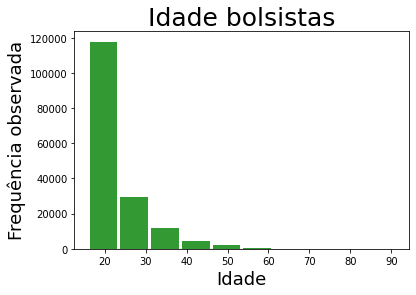

In [135]:
plt.hist(original_copia['IDADE'],rwidth=0.9, color = 'green', alpha=0.8)
plt.xlabel('Idade', size=18)
plt.ylabel('Frequência observada', size=18)
plt.title('Idade bolsistas', size=25)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()


##Distribuição da faixa etária dos bolsistas agrupada em 5 classes

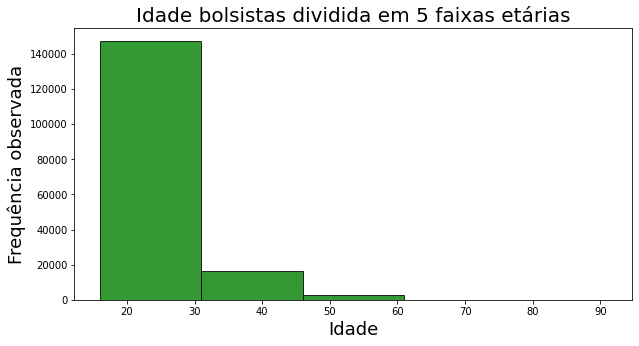

In [136]:
plt.hist(copia_4['IDADE'], 5, rwidth=1.0, color = 'green', alpha=0.8, edgecolor='black')
plt.xlabel('Idade', size=18)
plt.ylabel('Frequência observada', size=18)
plt.title('Idade bolsistas dividida em 5 faixas etárias', size=20)
plt.show()

##Distribuição das bolsas por estado

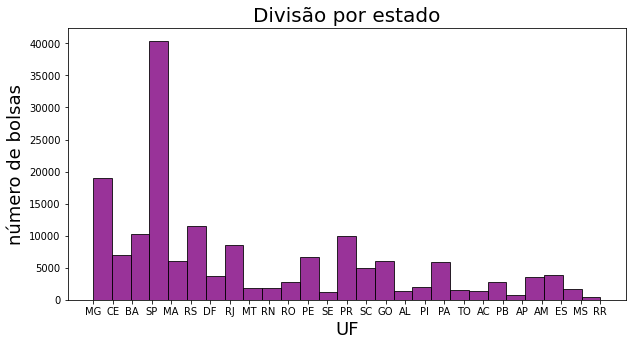

In [137]:
plt.hist(copia_4['UF_BENEFICIARIO'], 27, rwidth=1.0, color = 'purple', alpha=0.8, edgecolor='black')
plt.xlabel('UF', size=18)
plt.ylabel('número de bolsas', size=18)
plt.title('Divisão por estado', size=20)
plt.show()

**Atenção!Para gerar o mapa de calor é necessário retirar a '#' de frente dos comandos aqui e também na etapa 3), visto que para rodar o apply geocode é necessário 1h42min, aproximadamente.**

##Verificação de regiões com concentração do maior número de bolsistas. Foi usado um mapa de calor.

In [138]:
#data = df_endereco['GEOLOCALIZACAO_POINT']
#mapObtf= folium.Map(width='100%', height='100%',location=[-15.788497, -47.879873], zoom_start=3)
#mapData = [[x[0], x[1], (x[2]-50)/(100-50)] for x in data]
#HeatMap(mapData, gradient={0.0: 'blue',
 #                          0.6:'cyan',
  #                         0.7:'lime',
  #                         0.8:'yellow',
   #                        1.0:'red'}, radius = 30).add_to(mapObtf)
#mapObtf.save('mapa_calor_Brasil.html')
#mapObtf
#Cor mínima=50 e máxima =100
#A location é do Brasil



##Divisão das bolsas por sexo

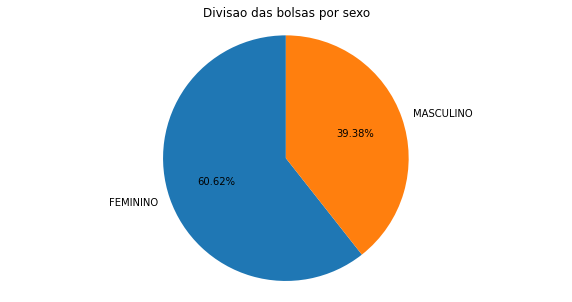

In [144]:
dados = original_copia['SEXO_BENEFICIARIO'].value_counts()
sexo=['FEMININO', 'MASCULINO']
sizes = [qt_sexo]
fig1,ax1 = plt.subplots()
ax1.pie(dados, labels=sexo, autopct='%1.2f%%',
        shadow=False, startangle=90)
plt.title('Divisao das bolsas por sexo')
ax1.axis('equal')
plt.show()

In [146]:
original_copia['RACA_BENEFICIARIO'].value_counts()

Parda            78067
Branca           64484
Preta            21153
Amarela           2900
Ind¡gena           153
NÆo Informada       73
Name: RACA_BENEFICIARIO, dtype: int64

In [147]:
original_copia['REGIAO_BENEFICIARIO'].value_counts()



SUDESTE         71644
NORDESTE        39252
SUL             26376
NORTE           16303
CENTRO-OESTE    13255
Name: REGIAO_BENEFICIARIO, dtype: int64

##Divisão de bolsas por região

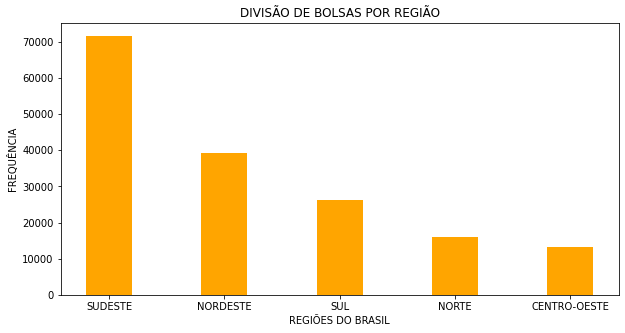

In [148]:
labels = ['SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'CENTRO-OESTE']
valores = [71644, 39252, 26376, 16030, 13255]
plt.bar(labels, valores,0.4, color='orange')
plt.xlabel("REGIÕES DO BRASIL")
plt.ylabel("FREQUÊNCIA")
plt.title("DIVISÃO DE BOLSAS POR REGIÃO")
plt.show()

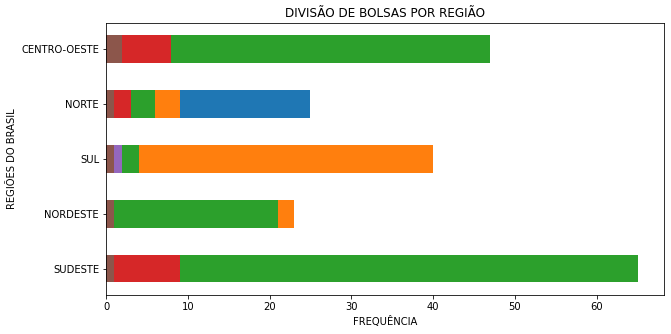

In [149]:
#EM andamento
rotulo = ['SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'CENTRO-OESTE']
Parda = [1, 4, 9, 25, 40]
Branca = [2, 23, 40, 9, 15]
Preta = [65, 21, 4, 6, 47]
Amarela = [9, 1, 2, 3, 8]
Indigena = [1, 1 , 2, 1, 2]
Nao_Infor= [1, 1, 1, 1, 2]

plt.barh(rotulo, Parda,0.5, label = 'Parda')
plt.barh(rotulo, Branca,0.5, label = 'Branca')
plt.barh(rotulo, Preta,0.5,label = 'Preta')
plt.barh(rotulo, Amarela,0.5,label = 'Amarela')
plt.barh(rotulo, Indigena,0.5,label = 'Indigena')
plt.barh(rotulo, Nao_Infor,0.5,label = 'Nao_Infor')

plt.xlabel("FREQUÊNCIA")
plt.ylabel("REGIÕES DO BRASIL")
plt.title("DIVISÃO DE BOLSAS POR REGIÃO")
plt.show()


In [150]:
original_copia['RACA_BENEFICIARIO'].value_counts()

Parda            78067
Branca           64484
Preta            21153
Amarela           2900
Ind¡gena           153
NÆo Informada       73
Name: RACA_BENEFICIARIO, dtype: int64

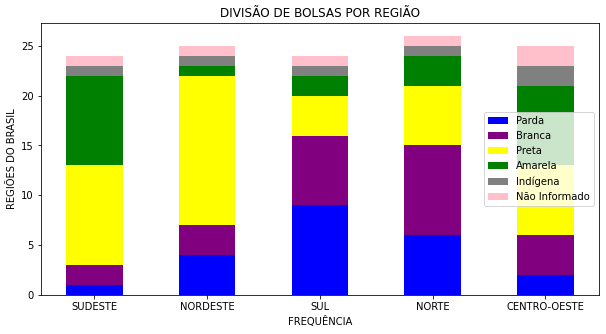

<Figure size 1440x720 with 0 Axes>

In [151]:
#EM andamento
rotulo = ['SUDESTE', 'NORDESTE', 'SUL', 'NORTE', 'CENTRO-OESTE']#Villages
Parda =np.array((1, 4, 9, 6, 2))
Branca =np.array((2, 3, 7, 9, 4))
Preta =np.array((10, 15, 4, 6, 7))
Amarela =np.array((9, 1, 2, 3, 8))
Indigena =np.array((1, 1 , 2, 1, 2))
Nao_Infor=np.array((1, 1, 1, 1, 2))

plt.bar(rotulo, Parda,0.5, color='blue')
plt.bar(rotulo, Branca,0.5, color='purple', bottom=Parda)
plt.bar(rotulo, Preta,0.5,color='yellow', bottom=Parda + Branca)
plt.bar(rotulo, Amarela,0.5,color='green', bottom = Parda + Branca+ Preta)
plt.bar(rotulo, Indigena,0.5,color='grey', bottom = Parda + Branca+ Preta + Amarela)
plt.bar(rotulo, Nao_Infor,0.5,color='pink', bottom = Parda + Branca+ Preta + Amarela + Nao_Infor)

plt.xlabel("FREQUÊNCIA")
plt.ylabel("REGIÕES DO BRASIL")
plt.title("DIVISÃO DE BOLSAS POR REGIÃO")
plt.legend(('Parda', 'Branca', 'Preta', 'Amarela', 'Indígena', 'Não Informado' ))
plt.figure(figsize=(20,10))
plt.show()

In [152]:
original_copia['TIPO_BOLSA'].value_counts()

INTEGRAL    130744
PARCIAL      36086
Name: TIPO_BOLSA, dtype: int64